## 9. Train a 3 layer neural network with iris dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
df = pd.read_csv('iris.csv')

In [3]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
x = df.iloc[:,:-1]
y = df.iloc[:, -1]

In [5]:
encoder = OneHotEncoder(sparse_output=False)
y_encoded = encoder.fit_transform(y.values.reshape(-1, 1))

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x, y_encoded, test_size=0.2, random_state=42)

In [7]:
model = keras.Sequential([
    layers.Input(shape=(x_train.shape[1],)),   
    layers.Dense(10, activation='relu'),       
    layers.Dense(10, activation='relu'),      
    layers.Dense(y_encoded.shape[1], activation='softmax')  
])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 10)                  │              50 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 3)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 193 (772.00 B)

 Trainable params: 193 (772.00 B)

 Non-trainable params: 0 (0.00 B)

In [8]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


history = model.fit(x_train, y_train, epochs=100, validation_split=0.2, verbose=1)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 101ms/step - accuracy: 0.2539 - loss: 2.3644 - val_accuracy: 0.5000 - val_loss: 1.5405
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.2734 - loss: 2.1980 - val_accuracy: 0.5000 - val_loss: 1.4906
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.3164 - loss: 1.9113 - val_accuracy: 0.5000 - val_loss: 1.4476
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.2695 - loss: 2.1365 - val_accuracy: 0.5000 - val_loss: 1.4099
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.3008 - loss: 1.8494 - val_accuracy: 0.5000 - val_loss: 1.3773
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.2812 - loss: 1.8159 - val_accuracy: 0.5000 - val_loss: 1.3504
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.2852 - loss: 1.7125 - val_accuracy: 0.5000 - val_loss: 1.3338
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.2773 - loss: 1.7967 - val_accuracy: 0.5000 - val_loss

In [9]:
y_pred_prob = model.predict(x_test)
y_pred = np.argmax(y_pred_prob, axis =1)

y_test_labels = np.argmax(y_test,axis =1)
accuracy = accuracy_score(y_test_labels, y_pred)
print(f"Accuracy of Neural Network: {accuracy * 100:.2f}%")
print("\n Classification Report:\n", classification_report(y_test_labels,y_pred))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Accuracy of Neural Network: 96.67%

 Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.89      0.94         9
           2       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30



Accuracy of Neural Network: 96.67%


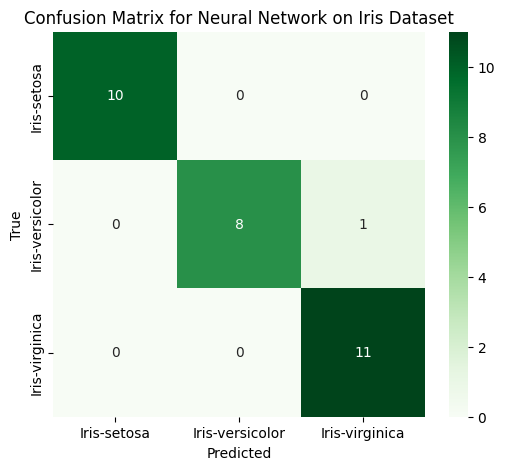

In [10]:
print(f"Accuracy of Neural Network: {accuracy *100:.2f}%")
cm= confusion_matrix(y_test_labels,y_pred)

plt.figure(figsize=(6,5))
sns.heatmap(cm,annot = True, fmt='d', cmap='Greens', xticklabels=encoder.categories_[0], yticklabels=encoder.categories_[0])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Neural Network on Iris Dataset')
plt.show()